# Latent Semantic Indexing  (潜在意味インデクシング)

単語文章行列`C`を、SVDを用いて小さい階数の行列で近似する。
クエリも同様に定数表現に書き換えることにより文章の類似度が計算可能となる。
この処理はLSIといsて知られている。

In [219]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
%matplotlib inline

In [230]:
font = "/Library/Fonts/OsakaMono.ttf"
# http://ossipedia.ipa.go.jp/ipafont/index.html
prop = font_manager.FontProperties(fname=font)


In [34]:
C = np.array([
    [1, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0],
    [1, 0, 0, 1, 1, 0],
    [0, 0, 0, 1, 0, 1]
])


In [442]:
recipes = ['親子丼','鶏肉ときのこのソテー', '丸ごと玉ねぎ', 'ホウレンソウと卵の炒めもの','卵焼き','ホウレンソウの胡麻和え']
ingredients = ['玉ねぎ', 'きのこ', '鶏肉', '卵', 'ホウレンソウ']
df = pd.DataFrame(C,columns=recipes)
#                  columns=['d{i}'.format(i=i) for i in range(1,7)])
df.rename(index={ i:v for i, v in enumerate(ingredients)})

,親子丼,鶏肉ときのこのソテー,丸ごと玉ねぎ,ホウレンソウと卵の炒めもの,卵焼き,ホウレンソウの胡麻和え
玉ねぎ,1,0,1,0,0,0
きのこ,0,1,0,0,0,0
鶏肉,1,1,0,0,0,0
卵,1,0,0,1,1,0
ホウレンソウ,0,0,0,1,0,1


表1 材料とレシピの行列

表1,の$d_{1}~d_{6}$はそれぞれ、以下のレシピを表すとする
['親子丼','鶏肉ときのこのソテー', '丸ごと玉ねぎ', 'ホウレンソウと卵の炒めもの','卵焼き','ホウレンソウの胡麻和え']

In [44]:
U,D,Vt = np.linalg.svd(C)
np.set_printoptions(3, suppress=True)
print("U:\n", U)
print("Σ:\n", np.diag(D))
print("Vt:\n", Vt)



U:
 [[ 0.44  -0.296 -0.569  0.577 -0.246]
 [ 0.129 -0.331  0.587  0.    -0.727]
 [ 0.476 -0.511  0.368  0.     0.614]
 [ 0.703  0.351 -0.155 -0.577 -0.16 ]
 [ 0.263  0.647  0.415  0.577  0.087]]
Σ:
 [[ 2.163  0.     0.     0.     0.   ]
 [ 0.     1.594  0.     0.     0.   ]
 [ 0.     0.     1.275  0.     0.   ]
 [ 0.     0.     0.     1.     0.   ]
 [ 0.     0.     0.     0.     0.394]]
Vt:
 [[ 0.749  0.28   0.204  0.447  0.325  0.121]
 [-0.286 -0.528 -0.186  0.626  0.22   0.406]
 [-0.28   0.749 -0.447  0.204 -0.121  0.325]
 [-0.     0.     0.577  0.    -0.577  0.577]
 [ 0.528 -0.286 -0.626 -0.186 -0.406  0.22 ]
 [ 0.    -0.    -0.    -0.577  0.577  0.577]]


上記のように、SVD(singular-value decomposition, 特異行列分解)をすると

- U: **'玉ねぎ', 'きのこ', '鶏肉', '卵', 'ホウレンソウ'** (食材)を行とするクエリ行列ができ
- Vt: **'親子丼','鶏肉ときのこのソテー', '丸ごと玉ねぎ', 'ホウレンソウと卵の炒めもの','卵焼き','ホウレンソウの胡麻和え'** レシピを列に持つレシピ行列ができます。
- Σ:特異値

ここで、`Σ2`以降の対角要素は全て`0`にします。
`Σ2×Vt`をすると、レシピ行列Vtの3行目以降は全て`0`になるので、
無視できます。`Σ2`の低近似されたSVD(truncated SVD) 

$C_{2} = U_{2}\sum_{2}V_{2}^{t}$

を計算すると

In [47]:
np.diag(D)[:2]

array([[ 2.163,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  1.594,  0.   ,  0.   ,  0.   ]])

In [48]:
Vt[:2]

array([[ 0.749,  0.28 ,  0.204,  0.447,  0.325,  0.121],
       [-0.286, -0.528, -0.186,  0.626,  0.22 ,  0.406]])

In [49]:
U[:2]

array([[ 0.44 , -0.296, -0.569,  0.577, -0.246],
       [ 0.129, -0.331,  0.587,  0.   , -0.727]])

In [103]:
D2 = np.array([v if i < 2 else 0 for i,v in enumerate(D)])

In [130]:
U.dot(np.diag(D2))

array([[ 0.952, -0.472,  0.   ,  0.   ,  0.   ],
       [ 0.28 , -0.528,  0.   ,  0.   ,  0.   ],
       [ 1.028, -0.815,  0.   ,  0.   ,  0.   ],
       [ 1.52 ,  0.559,  0.   ,  0.   ,  0.   ],
       [ 0.568,  1.031,  0.   ,  0.   ,  0.   ]])

In [160]:
C2 = np.dot(U[:,:2]*D[:2], Vt[:2])
C2

array([[ 0.848,  0.516,  0.282,  0.13 ,  0.206, -0.076],
       [ 0.361,  0.358,  0.155, -0.206, -0.025, -0.18 ],
       [ 1.003,  0.718,  0.361, -0.051,  0.155, -0.206],
       [ 0.978,  0.13 ,  0.206,  1.029,  0.617,  0.411],
       [ 0.13 , -0.386, -0.076,  0.899,  0.411,  0.487]])

上記のような、近似された行列$C$,

$\widetilde{C_{2}} \approx C $を得られる

In [478]:
np.linalg.norm(C-C2,'fro') #frobeniusによる精度

1.6677932876555253

In [479]:
C1 = np.dot(U[:,:1]*D[:1], Vt[:1])
np.linalg.norm(C-C1, 'fro') #frobenius

2.3072905296136073

In [169]:
truncated_SVD = lambda k: np.dot(U[:,:k]*D[:k], Vt[:k])

In [195]:
np.argmin([np.linalg.norm(C-truncated_SVD(k), 'fro') for k in range(1, D.size)])

3

In [199]:
np.linalg.norm(C-truncated_SVD(4), 'fro')

0.39391525049455717

In [204]:
U[:, :2]

array([[ 0.44 , -0.296],
       [ 0.129, -0.331],
       [ 0.476, -0.511],
       [ 0.703,  0.351],
       [ 0.263,  0.647]])

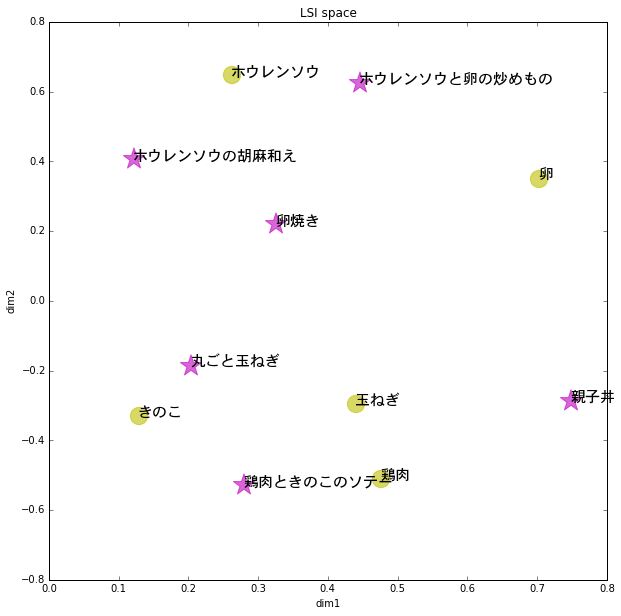

In [474]:
plt.figure(figsize=(10,10))
plt.xlabel('dim1')
plt.ylabel('dim2')
plt.title('LSI space')
plt.scatter(U[:,0], U[:,1], color='y', marker='o', s=300, alpha=0.6)
for i, ingredient in enumerate(ingredients):
    plt.annotate(ingredient, xy=(U[i,0],U[i,1]), fontproperties=prop,size='15')

plt.scatter(Vt[:2][0], Vt[:2][1], color='m', marker='*', s=500, alpha=0.6)
for i, recipe in enumerate(recipes):
    plt.annotate(recipe, xy=(Vt[:2][0][i],Vt[:2][1][i]), fontproperties=prop,size='15')


近似された$C_{2}$を使うことによって、次元削減をすることにより
2次元空間に写像できるようになった。

次元が削減できたことにより、類似度の計算量が減る。</br>
次に、以下のクエリq: きのこ、鶏肉、卵で検索されたとする。

$q = (0, 1, 1, 1, 0)^T $

どんなレシピを出すのが最適か?

2D空間でqueryベクトルを計算

$q_k = q^TU_{k}\sum_{k}^{-1}$

In [401]:
q = np.array([0, 1, 1, 1, 0]) #きのこ、鶏肉、卵を使った料理

In [402]:
D2_inv = np.linalg.inv(np.diag(D[:2]))
D2_inv

array([[ 0.462,  0.   ],
       [ 0.   ,  0.627]])

In [403]:
q2 = np.dot(q, U[:,:2].dot(D2_inv))
q2

array([ 0.605, -0.309])

上記でqを2次元空間に写像したベクトルを得る。
これを、図にマップすると

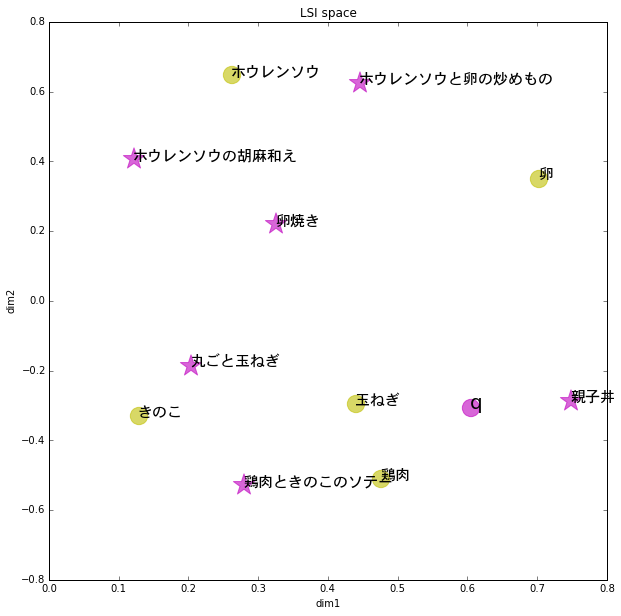

In [484]:
plt.figure(figsize=(10,10))
plt.xlabel('dim1')
plt.ylabel('dim2')
plt.title('LSI space')
plt.scatter(U[:,0], U[:,1], color='y', marker='o', s=300, alpha=0.6)
for i, ingredient in enumerate(ingredients):
    plt.annotate(ingredient, xy=(U[i,0],U[i,1]), fontproperties=prop,size='15')

plt.scatter(Vt[:2][0], Vt[:2][1], color='m', marker='*', s=500, alpha=0.6)
for i, recipe in enumerate(recipes):
    plt.annotate(recipe, xy=(Vt[:2][0][i],Vt[:2][1][i]), fontproperties=prop,size='15')

plt.scatter(*q2, s=300, alpha=0.6, color='m')
plt.annotate('q', xy=(q2[0],q2[1]), size='20')


新しいクエリqは, 親子丼に一番近そうに見える。
ここで、全てのレシピに対して $cosin$類似度を算出してみる。


In [487]:
cosin = scipy.spatial.distance.cosine

In [488]:
cosine_similarity = [(cosin(q2,Vt[:2,i]),recipes[i]) for i in range(Vt[:2].shape[1])] 
# where vt[:2, i] is document i (i=1..6)
sorted(cosine_similarity)
    
    

[(0.0056477105174975728, '親子丼'),
 (0.035634379966100527, '丸ごと玉ねぎ'),
 (0.18161668681247489, '鶏肉ときのこのソテー'),
 (0.51677502397478592, '卵焼き'),
 (0.85232680396680982, 'ホウレンソウと卵の炒めもの'),
 (1.1798513530660295, 'ホウレンソウの胡麻和え')]

図からも明らかのように、親子丼が一番近い。
よって、クエリqには親子丼を推薦するのが良い。